In [ ]:
# Buils and Evaluate Models 
# *********** CREDIT ONE DATA ************* CLASSIFICATION APPROACH *****************

# Regression Analysis is based on Continuous(Numerical) Variables vs Classification Analisys is based on Discrete Variables
# In this case we want to predict DEFAULT PAYMENT (yes / no), so we use classification aproach for a discrete variable

In [ ]:
# Selecting and Dividing the Data

# This task is centered around a regression problem using the CreditOne data, 
# but the final models will be built for a classification problem

In [6]:
# Imports
import pandas as pd
import numpy as np
import math 
from math import sqrt
import scipy
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

#Estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
from sklearn.model_selection import train_test_split

In [7]:
# Import pre-processed and cleaned data
creditv3 = pd.read_csv (r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\creditv3.csv', header =0)


In [8]:
creditv3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,...,BILL_AMT_JUL,BILL_AMT_AGO,BILL_AMT_SET,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET,default payment next month
0,1,20000,Female,University,Married,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,Default
1,2,120000,Female,University,Single,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,Default
2,3,90000,Female,University,Single,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,No Default
3,4,50000,Female,University,Married,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,No Default
4,5,50000,Male,University,Married,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,No Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,No Default
29996,29997,150000,Male,High School,Single,43,0,0,-1,-1,...,3502,1828,1683,0,0,129,8998,3526,1837,No Default
29997,29998,30000,Male,University,Single,37,0,0,-1,2,...,2758,3356,3565,3100,2000,4200,22000,0,0,Default
29998,29999,80000,Male,High School,Married,41,-1,0,0,0,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,Default


In [9]:
creditv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     29655 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null int64
PAY_STATUS_ABR                30000 non-null int64
PAY_STATUS_MAY                30000 non-null int64
PAY_STATUS_JUN                30000 non-null int64
PAY_STATUS_JUL                30000 non-null int64
PAY_STATUS_AGO                30000 non-null int64
PAY_STATUS_SEP                30000 non-null int64
BILL_AMT_ABR                  30000 non-null int64
BILL_AMT_MAY                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_AGO                  30000 non-null int64
BILL_AMT_SET         

In [10]:
# Selecting Data

# Based on previous results from Regression approach to this project (refer to Credit One Project-Regression Analysis.ipynb)
# From PCA analysis we can conclude "payment amount" and "payment status" are highly correlated to each other
# Bill amount is not correlated and can be dropped for modeling

In [11]:
# Need to change Default variable back to 1 and 0

# Import pre-processed and cleaned data
credit = pd.read_csv (r'C:\Users\Milena\Documents\Big Data\Caso 15 - Import and Prepare the Data\default of credit card clients.csv', header =0)


In [12]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
# Change DEFAULT values in the dataset 
creditv3['default payment next month'] = credit['default payment next month']

In [14]:
creditPCA = creditv3[['ID' , 'LIMIT_BAL' , 'SEX' , 'EDUCATION' , 'MARRIAGE' , 'AGE' , 
                      'PAY_STATUS_ABR' , 'PAY_STATUS_MAY', 'PAY_STATUS_JUN' , 'PAY_STATUS_JUL' , 'PAY_STATUS_AGO' , 'PAY_STATUS_SEP',
                      'PAY_AMT_ABR' , 'PAY_AMT_MAY' , 'PAY_AMT_JUN' , 'PAY_AMT_JUL' , 'PAY_AMT_AGO','PAY_AMT_SET','default payment next month']]

for col in creditPCA.columns:
    print(col) 

ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_STATUS_ABR
PAY_STATUS_MAY
PAY_STATUS_JUN
PAY_STATUS_JUL
PAY_STATUS_AGO
PAY_STATUS_SEP
PAY_AMT_ABR
PAY_AMT_MAY
PAY_AMT_JUN
PAY_AMT_JUL
PAY_AMT_AGO
PAY_AMT_SET
default payment next month


In [15]:
# Select the features

# Features
features = creditPCA.iloc[:,6:18]
print('Summary of feature sample')
features.head()

Summary of feature sample


,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,PAY_STATUS_AGO,PAY_STATUS_SEP,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET
0,-2,-2,-1,-1,2,2,0,0,0,0,689,0
1,2,0,0,0,2,-1,2000,0,1000,1000,1000,0
2,0,0,0,0,0,0,5000,1000,1000,1000,1500,1518
3,0,0,0,0,0,0,1000,1069,1100,1200,2019,2000
4,0,0,0,-1,0,-1,679,689,9000,10000,36681,2000


In [16]:
# Select the Dependent Variable 

# dependent variable
depVar = creditPCA['default payment next month']

In [17]:
# Establish the training set for the X-variables 

#Training Set (Feature Space: X Training)
X_train = (features[: 21000])
X_train.head()

,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,PAY_STATUS_AGO,PAY_STATUS_SEP,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET
0,-2,-2,-1,-1,2,2,0,0,0,0,689,0
1,2,0,0,0,2,-1,2000,0,1000,1000,1000,0
2,0,0,0,0,0,0,5000,1000,1000,1000,1500,1518
3,0,0,0,0,0,0,1000,1069,1100,1200,2019,2000
4,0,0,0,-1,0,-1,679,689,9000,10000,36681,2000


In [18]:
# Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [19]:
# Establish the testing set for the X-Variables 

#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       PAY_STATUS_ABR  PAY_STATUS_MAY  PAY_STATUS_JUN  PAY_STATUS_JUL  \
21000               0               0              -1              -1   
21001               0               0               0               0   
21002               0               0               0               0   
21003              -2              -2               0               0   
21004               2               0               0               0   

       PAY_STATUS_AGO  PAY_STATUS_SEP  PAY_AMT_ABR  PAY_AMT_MAY  PAY_AMT_JUN  \
21000              -1               1            0            0            0   
21001               0               2         7600         6974         6738   
21002               0               0         4522         4078         2011   
21003               0               2            0            0            0   
21004               0               2         5000            0        10000   

       PAY_AMT_JU

In [20]:
# Training Data is divided into two parts: X-train and y_train
# Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)

# Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default payment next month, dtype: int64

In [21]:
# Cross Validate

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((15750, 12), (5250, 12))

In [22]:
# # Building the Models and Choosing the Right Model

# 1. Imports (already done above)
# 2. Models (Establish variables that will be use for defining each model)
# Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [23]:
# 3. Features (set specific variable for features)
features = creditPCA.iloc[:,6:18]
print('Summary of feature sample')
features.head()

Summary of feature sample


,PAY_STATUS_ABR,PAY_STATUS_MAY,PAY_STATUS_JUN,PAY_STATUS_JUL,PAY_STATUS_AGO,PAY_STATUS_SEP,PAY_AMT_ABR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AGO,PAY_AMT_SET
0,-2,-2,-1,-1,2,2,0,0,0,0,689,0
1,2,0,0,0,2,-1,2000,0,1000,1000,1000,0
2,0,0,0,0,0,0,5000,1000,1000,1000,1500,1518
3,0,0,0,0,0,0,1000,1069,1100,1200,2019,2000
4,0,0,0,-1,0,-1,679,689,9000,10000,36681,2000


In [24]:
# 4. Not mandatory, but it might be a good idea to validate that the correct column is being used for the dependent variable
# dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [25]:
# 5. Use the model variables (established in step 2)
model.fit(X_train,y_train)

NameError: name 'model' is not defined

In [26]:
# 6. Random Forest

modelRF.fit(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
# 7. Support Vector Regression

modelSVR.fit(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
# 8. Linear Regression

modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Choosing the Right Model (Cross Validation Score)

print(cross_val_score(modelRF, X_train, y_train)) 

#These values correspond to the the following:

# 1st value: The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
# 2nd value: The time for fitting the estimator on the train set for each cv split.
# 3rd Value: The time for scoring the estimator on the test set for each cv split. 

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.07691216 0.09855091 0.04706717]


In [30]:
print(cross_val_score(modelSVR, X_train, y_train)) 

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

[-0.01271949 -0.01360431 -0.0371272 ]


In [31]:
print(cross_val_score(modelLR, X_train, y_train)) 

[0.12047235 0.12207147 0.09936232]


C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
# Cross Validation Score
# modelRF: [0.07691216 0.09855091 0.04706717] 
# modelSVR [-0.01271949 -0.01360431 -0.0371272 ]
# modelLR  [0.12047235 0.12207147 0.09936232] BEST MODEL

In [32]:
# Model Fitting Random Forest
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.07801563 0.10125446 0.06008292]


0.7913733423943458

In [83]:
# Model Fitting SVR
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train))
modelSVR.score(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

[-0.01363285 -0.02152357 -0.02210254]


0.8696438731840559

In [33]:
# Model Fitting LR
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

[0.12047235 0.12207147 0.09936232]


C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.11625330262732547

In [85]:
#Make Predictions Random Forest
predictions = modelRF.predict(X_test)

In [86]:
# Evaluate Results Random Forest
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.100
RMSE: 0.405


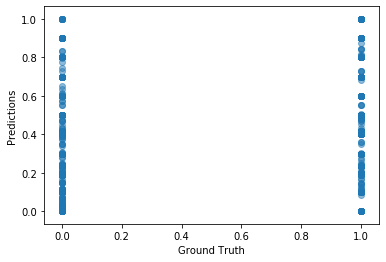

In [87]:
# Plotting the Results (Plot a comparison between the known values in the test set and the predictions made by the model)

plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

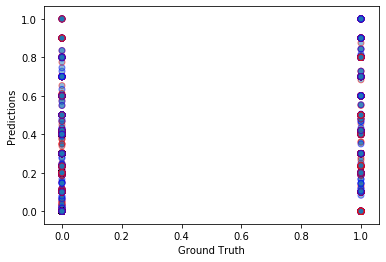

In [88]:
# Changed color argument by edgecolor
 
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

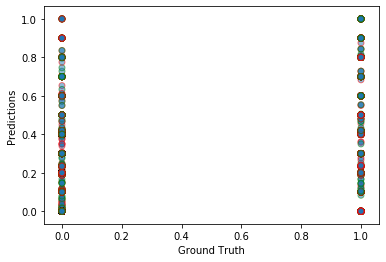

In [89]:
plt.scatter(y_test, predictions, edgecolors =['green','red'],  alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

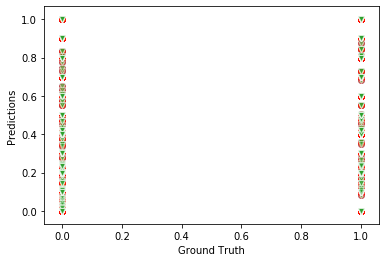

In [90]:
plt.scatter(y_test, predictions, alpha = 0.5)

plt.scatter(y_test,predictions, edgecolor = 'red' , marker = "o",  alpha = 0.5)
plt.scatter(y_test,predictions, edgecolor = 'white' , marker = "v", alpha = 0.5)

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [34]:
#Make Predictions for Logistic Regression

predictions = modelLR.predict(X_test)

# Evaluating the Results 

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.108
RMSE: 0.402


In [92]:
predictions = modelLR.predict(X_test)

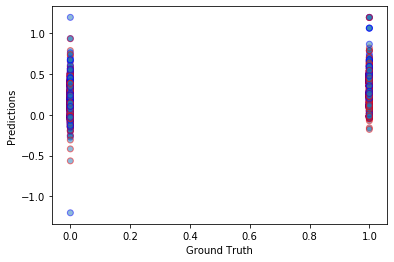

In [93]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

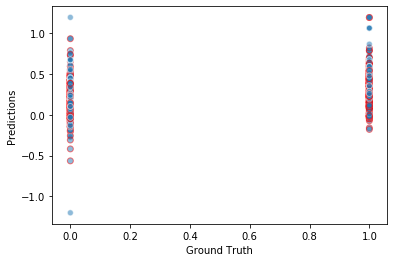

In [94]:
plt.scatter(y_test, predictions, edgecolors =['white','red'],  alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

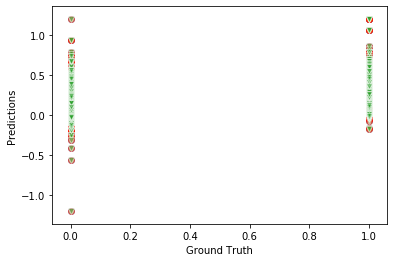

In [95]:
plt.scatter(y_test, predictions, alpha = 0.5)

plt.scatter(y_test,predictions, edgecolor = 'red' , marker = "o",  alpha = 0.5)
plt.scatter(y_test,predictions, edgecolor = 'white' , marker = "v", alpha = 0.5)

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [35]:
#Make Predictions for Support Vector Model

predictions = modelSVR.predict(X_test)

# Evaluating the Results 

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.012
RMSE: 0.428


In [36]:
predictions = modelSVR.predict(X_test) # This is the model that fits best the predictions 

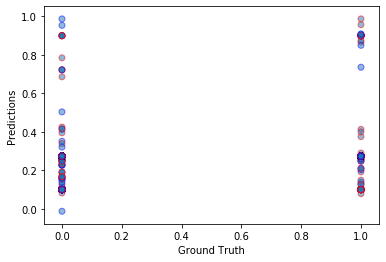

In [37]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

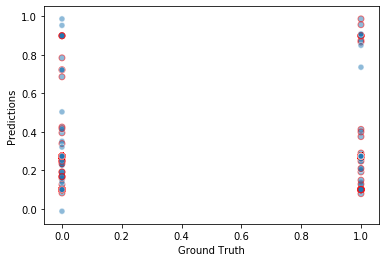

In [38]:
plt.scatter(y_test, predictions, edgecolors =['white','red'],  alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [ ]:
# Feature Engineering 
# This was previously done @ Credit One Project-Regression Analysis.ipynb in reference to PCA process

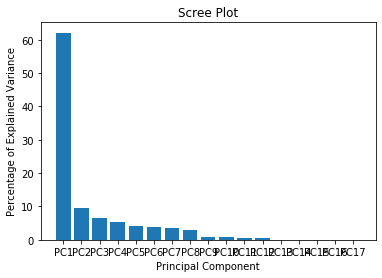

In [122]:
# Below resulting Graph from PCA feature 

# Almost all of the variation is along the first PC (principal component), 
# so PC1 to PC2 should do a good job representing the original data 


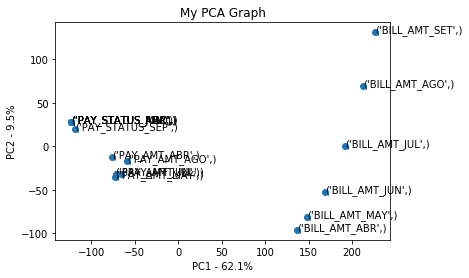

In [136]:
# The Pay Status clustered on the left side, suggesting that they are correlated with each other
# The Bill Amount clustered on the Right side, suggesting that they are correlated with each other
# The separation of the 2 clusters along the x-axis suggest that the samples are very different to each other

In [ ]:
# From PCA analysis we can conclude "payment amount" and "payment status" are highly correlated to each other
# Bill amount is not correlated and can be dropped for modeling

In [ ]:
# ****** Tunning Classification Models

In [ ]:
# ****** Tunning Random Forest Model 

In [103]:
n_estimators = (20, 100, 300)
max_depth = (5, 8, 15, 30)
min_samples_split = (2, 5, 10)
min_samples_leaf = (2, 5, 10)

In [110]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state =(1),
n_estimators = (20, 100, 300),
max_depth = (5, 8, 15, 30),
min_samples_split = (2, 5, 10),
min_samples_leaf = (2, 5, 10))


hyperF = dict(n_estimators = n_estimators, 
              max_depth = max_depth, 
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = sklearn.model_selection.GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
gridF = gridF.fit (X_train, y_train)

print(gridF.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.1min finished


{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Tuned up model

In [52]:
modelRF = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
modelRF.fit(X_train,y_train)

modelRF.score(X_train,y_train)

0.8267301587301588

In [ ]:
# Another try to tune up RF model with a different set of features

In [62]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = (150, 600, 800, 1000)
max_depth = (50, 80, 100)
min_samples_split = (2, 5, 10)
min_samples_leaf = (1, 2, 4)




forest = RandomForestClassifier(random_state =(1),
                                n_estimators = (150, 600, 800, 1000),
                                max_depth = (50, 80, 100),
                                min_samples_split = (2, 5, 10),
                                min_samples_leaf = (1, 2, 4))


hyperF = dict(n_estimators = n_estimators, 
               max_depth = max_depth, 
               min_samples_split = min_samples_split, 
               min_samples_leaf = min_samples_leaf)

gridF = sklearn.model_selection.RandomizedSearchCV(estimator = forest,
                                                   param_distributions = hyperF,
                                                   n_iter = 100,
                                                   cv = 3,
                                                   verbose=2,
                                                   random_state=42,
                                                   n_jobs = -1)
gridF = gridF.fit (X_train, y_train)

print(gridF.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.8min finished


{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 80}


In [126]:
# With Randomized Search and a different set of features got other results 
# Combined features from other attepmts and got a unique mix of features which incremented accuracy

modelRF = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=80,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=-1, oob_score=False, random_state= 25,
                      verbose=0, warm_start=False)

In [127]:
modelRF.fit(X_train,y_train)

modelRF.score(X_train,y_train)

0.9707936507936508

In [216]:
n_estimators = (50,100,150)
max_depth = (2,3,4,5,6,7)
max_features = (2,3,4,5,6,7)


In [101]:
# Another try with a different set of features 

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

param_dist = {'n_estimators':(50,100,150),
'max_features':(2,3,4,5,6,7),              
'max_depth' :(2,3,4,5,6),
'min_samples_split' : (2, 5, 10),
'min_samples_leaf' : (1, 2, 4),
'random_state': (0,1,10,25,50,100,150)}

gridF = sklearn.model_selection.RandomizedSearchCV(forest, param_dist, cv = 3, n_jobs = -1)
gridF = gridF.fit (X_train, y_train)

print(gridF.best_params_)

{'random_state': 25, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 4}


In [102]:
modelRF = RandomForestClassifier(criterion='gini',
                                 random_state = 25,
                                 n_estimators = 100, 
                                 min_samples_split = 2, 
                                 min_samples_leaf = 4,
                                 max_features = 7,
                                 max_depth = 4)

In [103]:
modelRF.fit(X_train,y_train)

modelRF.score(X_train,y_train)

0.8204444444444444

In [124]:
# Another try with a different set of features, playing with the numbers 

modelRF = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=80,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=-1, oob_score=False, random_state= 25,
                      verbose=0, warm_start=False)

In [128]:
modelRF.fit(X_train,y_train)

modelRF.score(X_train,y_train)

0.9707936507936508

In [129]:
#Make Predictions LR
predictions = modelRF.predict(X_test)

In [130]:
# Evaluating the Results on tune up model

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.107
RMSE: 0.448


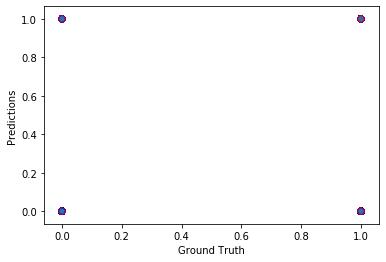

In [131]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [220]:
# ****** Tunning Logistic Regression Model

In [47]:
# Clasification Models

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.neural_network import MLPClassifier



In [35]:
# Logistic Regresion Model ( Original Data)
#Set up the hyperparameter grid in non scale data
param_grid = {'C': np.logspace(-5, 8, 15)}

#logistic regresion classifier
logreg = LogisticRegression()

## Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 



Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}


In [72]:
modelLR = LogisticRegression(penalty='l2', 
                             dual=False, 
                             tol=0.0001, 
                             C=0.5179474679231213, 
                             fit_intercept=True, 
                             intercept_scaling=1, 
                             class_weight=None, 
                             random_state=0, 
                             solver='lbfgs', 
                             max_iter=100, 
                             multi_class='auto', 
                             verbose=2, 
                             warm_start=False, 
                             n_jobs=-1, 
                             l1_ratio=None)

In [43]:
modelLR.fit(X_train,y_train)

modelLR.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


0.7986666666666666

In [44]:
#Make Predictions LR
predictions = modelLR.predict(X_test)

In [50]:
# Evaluating the Results on tune up model

predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


R Squared: -0.154
RMSE: 0.449


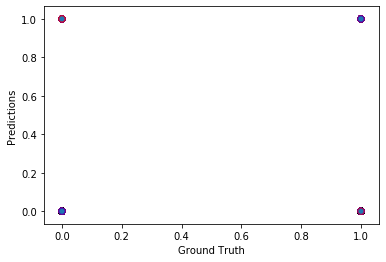

In [51]:
plt.scatter(y_test, predictions, edgecolors=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [ ]:
# ****** Tunning Support Vector Model

In [3]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC 
from sklearn.svm import SVC 

In [4]:
modelSVC = LinearSVC(penalty='l2',
                         loss='squared_hinge', 
                         dual=True, 
                         tol=0.0001, 
                         C=1.0, 
                         multi_class='ovr', 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         verbose=0, 
                         random_state=0, 
                         max_iter=2000)

In [40]:
modelSVC.fit(X_train,y_train)

modelSVC.score(X_train,y_train)

C:\Users\Milena\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.32076190476190475

In [41]:
modelSVC2 = SVC(C=0.05179474679231213, 
                kernel='rbf', 
                degree=3, 
                gamma='scale', 
                coef0=0.0, 
                shrinking=True, 
                probability=False, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=False, 
                max_iter=-1, 
                decision_function_shape='ovr', 
                random_state=None)

In [42]:
modelSVC2.fit(X_train,y_train)

modelSVC2.score(X_train,y_train)

0.7748571428571429

In [43]:
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


R Squared: -0.012
RMSE: 0.428


In [ ]:
##Models Performance Comparison
#ROC Curve

In [140]:
##Create data partition 
X= credit.drop('default payment next month', axis=1)
y= credit['default payment next month']

In [143]:
modelRF = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=80,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=-1, oob_score=False, random_state= 25,
                      verbose=0, warm_start=False)

modelRF.fit(X_train, y_train)
y_pred = modelRF.predict(X_test)
print('AccuracyRF:', metrics.accuracy_score(y_pred,y_test))


## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)


Accuracy: 0.7992380952380952


In [154]:
modelSVC2 = SVC(C=0.05179474679231213, 
                kernel='rbf', 
                degree=3, 
                gamma='scale', 
                coef0=0.0, 
                shrinking=True, 
                probability=True, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=False, 
                max_iter=-1, 
                decision_function_shape='ovr', 
                random_state=None)

modelSVC2.fit(X_train, y_train)
y_pred = modelSVC2.predict(X_test)
print('AccuracySVC2:', metrics.accuracy_score(y_pred,y_test))


## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)


AccuracySVC2: 0.7619047619047619


In [150]:
modelLR = LogisticRegression(penalty='l2', 
                             dual=False, 
                             tol=0.0001, 
                             C=0.5179474679231213, 
                             fit_intercept=True, 
                             intercept_scaling=1, 
                             class_weight=None, 
                             random_state=0, 
                             solver='lbfgs', 
                             max_iter=100, 
                             multi_class='auto', 
                             verbose=2, 
                             warm_start=False, 
                             n_jobs=-1, 
                             l1_ratio=None)

modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
print('AccuracySVC:', metrics.accuracy_score(y_pred,y_test))


## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.1s finished


AccuracySVC: 0.7902857142857143


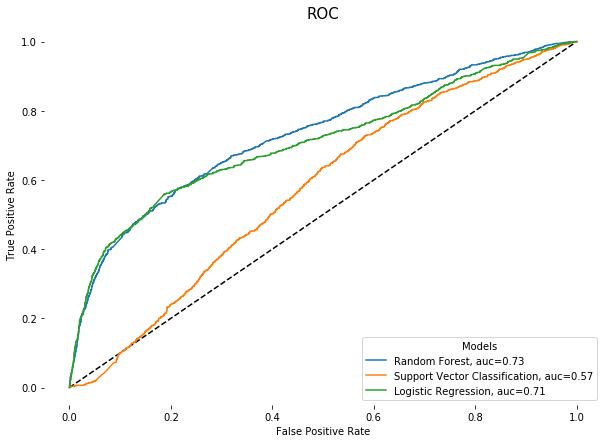

In [161]:
y_pred_proba_RF = modelRF.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_SVC2 = modelSVC2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_SVC2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_SVC2)

y_pred_proba_LR = modelLR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Support Vector Classification, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

In [166]:
##Mean Accuracy
#Append different models
models = []

#Random Forest Classifier
models.append(('Random Forest', 
              RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=80,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=-1, oob_score=False, random_state= 25,
                      verbose=0, warm_start=False),'none'))

#Support Vector Classifier
models.append(('Support Vector Classifier', 
              SVC(C=0.05179474679231213, 
                kernel='rbf', 
                degree=3, 
                gamma='scale', 
                coef0=0.0, 
                shrinking=True, 
                probability=True, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=False, 
                max_iter=-1, 
                decision_function_shape='ovr', 
                random_state=None),'none'))

#Logistic Regression
models.append(('Logistic Regression',
               LogisticRegression(penalty='l2', 
                             dual=False, 
                             tol=0.0001, 
                             C=0.5179474679231213, 
                             fit_intercept=True, 
                             intercept_scaling=1, 
                             class_weight=None, 
                             random_state=0, 
                             solver='lbfgs', 
                             max_iter=100, 
                             multi_class='auto', 
                             verbose=2, 
                             warm_start=False, 
                             n_jobs=-1, 
                             l1_ratio=None),'none'))

# ********** Additional scenarios 
# Logistic Regression (with standardized data)
# models.append(('LogReg(Std)',
#               LogisticRegression(C=3.73, random_state=0),'Std'))

# Logistic Regression with standardized and important features
# models.append(('LogReg(Std&Imp)',
#               LogisticRegression(C=3.73, random_state=0),'imp'))


In [167]:
#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, Std in models:
    if Std == 'Std':
        cv_results = cross_val_score(model, stdX, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)       
    elif Std == 'none':
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, Ximp, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

Random Forest: 0.816034 (0.009125)
Support Vector Classifier: 0.778800 (0.000050)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Logistic Regression: 0.778867 (0.000086)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


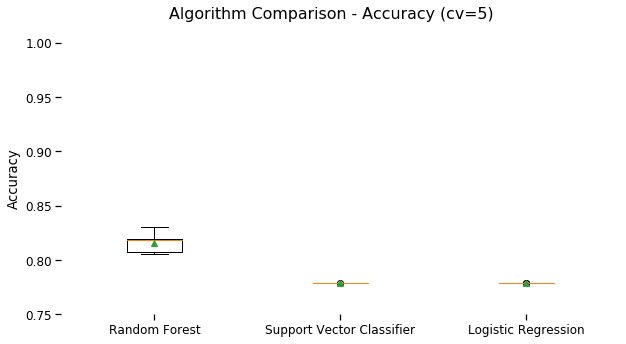

In [171]:
# Plot all the accuracy results vs. each model 
fig = plt.figure(figsize=(10,5))
sn.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - Accuracy (cv=5)')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1])
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);